# "Free-lunch" of Diversification

> **Note the following:**
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
#%pip install matplotlib-venn
#%pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# autoreload modules when code is run#
%load_ext autoreload
%autoreload 2

# user written modules
from dataproject import StockData

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,102.807134,103.929729,101.754317,102.896632,101.144880,1.058799e+08,0.001185
std,54.805248,55.376861,54.256942,54.845197,55.262034,5.365632e+07,0.018777
min,28.950001,29.082500,28.690001,29.004999,26.959053,2.404830e+07,-0.128647
25%,46.929376,47.290626,46.503751,46.973749,44.791505,7.077085e+07,-0.007559
50%,110.451248,112.320000,108.813751,110.389999,108.149418,9.216420e+07,0.000893
75%,151.190002,153.287498,149.927498,151.339996,150.132576,1.261926e+08,0.010544
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.479400e+08,0.119808


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,124.208224,125.420143,122.937248,124.182253,108.118283,8.634918e+06,0.000536
std,26.894823,27.082769,26.688267,26.912746,31.406659,4.630659e+06,0.019802
min,55.259998,58.490002,51.599998,54.220001,45.317299,1.640100e+06,-0.221248
25%,106.949997,107.762497,105.987499,106.847498,86.738312,5.806175e+06,-0.007709
50%,118.355000,119.255001,117.439999,118.274998,96.132313,7.521250e+06,0.000738
75%,148.097504,149.277496,145.804996,147.580006,143.261757,1.012775e+07,0.008751
max,187.119995,189.679993,186.179993,188.050003,178.740112,5.723100e+07,0.227407


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,52.584452,52.944232,52.204364,52.576365,47.317078,1.419623e+07,0.000396
std,6.843534,6.883937,6.794504,6.849499,8.971716,6.391772e+06,0.011990
min,38.759998,38.889999,36.270000,37.560001,32.094223,2.996300e+06,-0.096725
25%,46.107500,46.367499,45.860001,46.080002,38.771410,1.025770e+07,-0.004733
50%,53.020000,53.395000,52.565001,53.025000,46.784449,1.288415e+07,0.000693
75%,59.250000,59.650000,58.770000,59.237499,56.848198,1.606878e+07,0.005969
max,67.000000,67.199997,65.720001,66.209999,62.319374,6.784570e+07,0.064796


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,149.169995,150.257588,148.043805,149.182242,135.942377,7.726653e+06,0.000336
std,17.068344,17.169888,16.975243,17.077461,21.952289,6.861142e+06,0.011975
min,111.930000,112.800003,109.160004,111.139999,91.930855,2.114900e+06,-0.100379
25%,134.005005,134.935001,132.727501,133.937496,115.937925,5.449450e+06,-0.005004
50%,148.455002,149.465004,147.059998,148.284996,133.900070,6.558650e+06,0.000283
75%,163.702499,164.842499,162.482498,163.612499,156.653694,8.211125e+06,0.006020
max,185.100006,186.690002,184.179993,186.009995,175.705063,1.513195e+08,0.079977


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,31.253618,31.598169,30.907056,31.252812,28.703716,5.827184e+07,0.000574
std,6.209880,6.257163,6.154673,6.201696,6.404639,2.590219e+07,0.020358
min,19.260000,19.670000,17.950001,18.080000,16.361561,1.380540e+07,-0.153974
25%,27.090000,27.402500,26.737500,27.007500,24.238400,4.097392e+07,-0.009171
50%,29.990000,30.240000,29.660000,29.980000,27.200106,5.151200e+07,0.000352
75%,34.412499,34.812501,34.080000,34.470001,32.972404,6.808665e+07,0.010360
max,49.910000,50.110001,49.029999,49.380001,46.471874,2.595458e+08,0.177962


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,100.278355,101.313048,99.234095,100.279375,96.837206,7.571193e+06,0.000536
std,31.067600,31.354797,30.714940,31.012852,31.058225,4.199420e+06,0.019503
min,50.799999,51.070000,50.349998,50.830002,47.433571,1.821900e+06,-0.128081
25%,77.355000,78.009998,76.199997,77.155003,72.749058,5.251575e+06,-0.008544
50%,98.500000,99.545002,97.720001,98.615002,95.724358,6.578750e+06,0.000364
75%,122.610001,124.085001,120.985003,122.392500,120.247231,8.558225e+06,0.010320
max,176.350006,179.100006,175.500000,177.509995,172.454742,4.817610e+07,0.155314


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


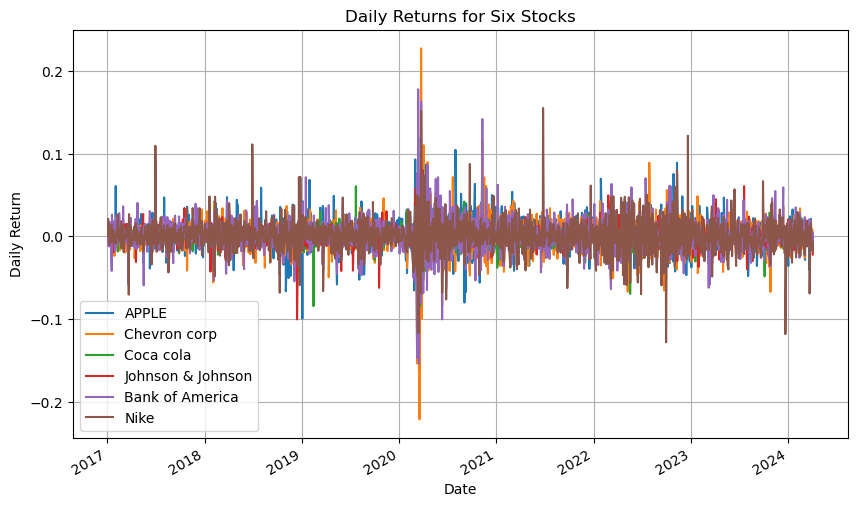

In [3]:
SD = StockData(['AAPL', 'CVX', 'KO', 'JNJ', 'BAC', 'NKE'], 2017, 2024)


# Call the six_stocks_ method to calculate daily returns and get the DataFrame
df = SD.six_stocks_()


# Plot the DataFrame with explicit legend labels
df.plot(figsize=(10, 6))
plt.title('Daily Returns for Six Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')


# Set legend labels to ticker symbols
plt.legend(['APPLE', 'Chevron corp', 'Coca cola', 'Johnson & Johnson', 'Bank of America', 'Nike'])


plt.grid(True)
plt.show()

In [4]:
# Set the display precision to 15
pd.set_option('display.float_format', '{:.15f}'.format)


# Call the expected_return_ method to get the filtered DataFrame
expected_returns_df_filtered = SD.expected_return_()


# Display the filtered DataFrame containing the expected returns with company names
display(expected_returns_df_filtered)


,Expected Return (%)
Ticker,
Apple Inc.,0.118517546361713
Chevron Corporation,0.053565234666804
The Coca-Cola Company,0.039587011642082
Johnson & Johnson,0.033614195316848
Bank of America Corporation,0.057441836856559
"Nike, Inc.",0.053610268443786


In [5]:
print("Covariance Matrix for Two Stocks:")
display(SD.calculate_covariance("two"))


print("Covariance Matrix for Four Stocks:")
display(SD.calculate_covariance("four"))


print("Covariance Matrix for Six Stocks:")
display(SD.calculate_covariance("six"))


Covariance Matrix for Two Stocks:


,AAPL,CVX
AAPL,0.000352568418935,0.000127784668894
CVX,0.000127784668894,0.000392115095823


Covariance Matrix for Four Stocks:


,AAPL,CVX,KO,JNJ
AAPL,0.000352568418935,0.000127784668894,0.000087696141461,0.000083040182840
CVX,0.000127784668894,0.000392115095823,0.000099501925036,0.000084511545453
KO,0.000087696141461,0.000099501925036,0.000143752606759,0.000075451254917
JNJ,0.000083040182840,0.000084511545453,0.000075451254917,0.000143389724715


Covariance Matrix for Six Stocks:


,AAPL,CVX,KO,JNJ,BAC,NKE
AAPL,0.000352568418935,0.000127784668894,0.000087696141461,0.000083040182840,0.000165280850446,0.000177928629524
CVX,0.000127784668894,0.000392115095823,0.000099501925036,0.000084511545453,0.000245200840560,0.000142291639938
KO,0.000087696141461,0.000099501925036,0.000143752606759,0.000075451254917,0.000111106081408,0.000093978049656
JNJ,0.000083040182840,0.000084511545453,0.000075451254917,0.000143389724715,0.000090695872587,0.000075580604920
BAC,0.000165280850446,0.000245200840560,0.000111106081408,0.000090695872587,0.000414458174425,0.000182308108485
NKE,0.000177928629524,0.000142291639938,0.000093978049656,0.000075580604920,0.000182308108485,0.000380371934722


In [6]:
print("Invers Covariance Matrix for Two Stocks:")
display(SD.calculate_invers_covariance("two"))


print("Invers Covariance Matrix for Four Stocks:")
display(SD.calculate_invers_covariance("four"))


print("Invers Covariance Matrix for Six Stocks:")
display(SD.calculate_invers_covariance("six"))


Invers Covariance Matrix for Two Stocks:
Number: two


,AAPL,CVX
AAPL,3216.207280421243013,-1048.115685422128536
CVX,-1048.115685422128308,2891.837442381200617


Invers Covariance Matrix for Four Stocks:
Number: four


,AAPL,CVX,KO,JNJ
AAPL,3623.039088075488053,-642.828376149379210,-1192.112738462663856,-1092.023901784886675
CVX,-642.828376149379324,3306.915180330137900,-1477.187790888293875,-799.473284004648463
KO,-1192.112738462663629,-1477.187790888293421,10896.131753925072189,-4172.503523959402628
JNJ,-1092.023901784886903,-799.473284004648349,-4172.503523959401718,10273.171367054632356


Invers Covariance Matrix for Six Stocks:
Number: six


,AAPL,CVX,KO,JNJ,BAC,NKE
AAPL,4213.464781165086606,-131.446800692384812,-649.714129130640117,-934.828206110633914,-672.539972443249098,-1253.165524198574076
CVX,-131.446800692384357,4289.521123245278432,-856.040489739214195,-595.868757068887021,-2017.022295288461237,-246.522367516872976
KO,-649.714129130639549,-856.040489739213513,11436.862004359893035,-4009.176238032306173,-1020.165954881101925,-915.954393476636483
JNJ,-934.828206110633801,-595.868757068887021,-4009.176238032306173,10323.454161970006680,-358.353844632100788,-228.796299443475050
BAC,-672.539972443249098,-2017.022295288461692,-1020.165954881101925,-358.353844632101016,4579.116130835433069,-802.326984675017798
NKE,-1253.165524198574076,-246.522367516873032,-915.954393476636596,-228.796299443475050,-802.326984675017798,3963.738761370276734


In [7]:
display(SD.one_vector("two"))
display(SD.one_vector("four"))
display(SD.one_vector("six"))

array([[1.],
       [1.]])

array([[1.],
       [1.],
       [1.],
       [1.]])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [8]:
display(SD.calculate_z_vector("two"))
display(SD.calculate_z_vector("four"))
display(SD.calculate_z_vector("six"))

Number: two


array([[2168.091595  ],
       [1843.72175696]])

Number: four


array([[ 696.07407168],
       [ 387.42572929],
       [4054.32770061],
       [4209.17065731]])

Number: six


array([[ 571.77014859],
       [ 442.62041294],
       [3985.8107991 ],
       [4196.43081668],
       [-291.29292108],
       [ 516.97319206]])

In [9]:
# Set the display precision to 15
#pd.set_option('display.float_format', '{:.15f}'.format)


#display(SD.normalize_z_vector("two"))
#display(SD.normalize_z_vector("four"))
#display(SD.normalize_z_vector("six"))


# Set the display precision to 15
pd.set_option('display.float_format', '{:.15f}'.format)


# Convert the normalized vectors to pandas DataFrames and display them
display(pd.DataFrame(SD.normalize_z_vector("two")))
display(pd.DataFrame(SD.normalize_z_vector("four")))
display(pd.DataFrame(SD.normalize_z_vector("six")))

Number: two


,0
0,0.540426835645496
1,0.459573164354504


Number: four


,0
0,0.074470333667152
1,0.041449214250616
2,0.433757194737436
3,0.450323257344795


Number: six


,0
0,0.060682571473584
1,0.046975773237061
2,0.423018321773514
3,0.445371647322690
4,-0.030915226244430
5,0.054866912437583


In [10]:
display(SD.check_results("two"))
display(SD.check_results("four"))
display(SD.check_results("six"))

Number: two


array([[1.],
       [1.]])

Number: four


array([[1.],
       [1.],
       [1.],
       [1.]])

Number: six


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [11]:
print("Expected return for two stock portfolio:")
display(SD.portfolio_expected_return_two)
print("Expected return for four stock portfolio:")
display(SD.portfolio_expected_return_four)
print("Expected return for six stock portfolio:")
display(SD.portfolio_expected_return_six)


Expected return for two stock portfolio:


0.0886672189321866

Expected return for four stock portfolio:


0.04335468283812161

Expected return for six stock portfolio:


0.04259066324983087

In [12]:
SD.calculate_portfolio_variances()


# Print the portfolio variances
print("Portfolio variance for two stock portfolio:", SD.portfolio_variance_two)
print("Portfolio variance for four stock portfolio:", SD.portfolio_variance_four)
print("Portfolio variance for six stock portfolio:", SD.portfolio_variance_six)

Portfolio variance for two stock portfolio: 0.000249263839632997
Portfolio variance for four stock portfolio: 0.00010698621985387767
Portfolio variance for six stock portfolio: 0.00010613105917356065


In [13]:
SD.calculate_portfolio_std_devs()


# Print the portfolio standard deviations
print("Portfolio standard deviation for two stock portfolio:", SD.portfolio_std_dev_two)
print("Portfolio standard deviation for four stock portfolio:", SD.portfolio_std_dev_four)
print("Portfolio standard deviation for six stock portfolio:", SD.portfolio_std_dev_six)

Portfolio standard deviation for two stock portfolio: 0.01578809170333758
Portfolio standard deviation for four stock portfolio: 0.010343414322837391
Portfolio standard deviation for six stock portfolio: 0.010301992970952788


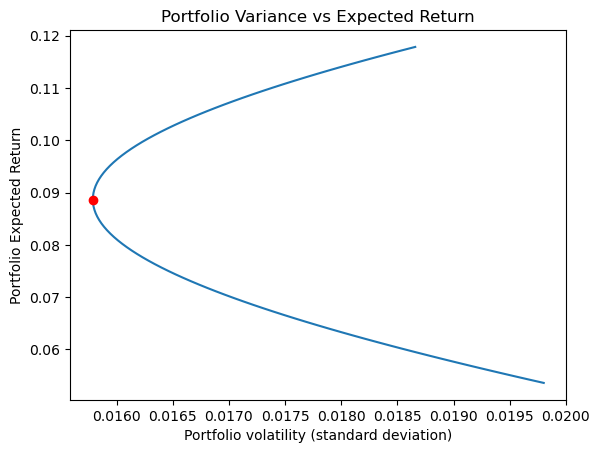

In [14]:
# Create an array of weights from 0 to 1 with a step of 0.01
weights = np.arange(0, 1.0, 0.01)


# Initialize lists to store the portfolio variances and expected returns
portfolio_variances = []
portfolio_expected_returns = []
portfolio_volatilities = []


# Loop over the weights
for w in weights:
    # Create the weight vector
    weight_vector = np.array([w, 1 - w])


    # Calculate the portfolio variance
    portfolio_variance = np.dot(weight_vector.T, np.dot(SD.calculate_covariance("two"), weight_vector))
    portfolio_variances.append(portfolio_variance)


    #Calculate the portfolio volatility
    portfolio_volatility = np.sqrt(portfolio_variance)
    portfolio_volatilities.append(portfolio_volatility)


    # Calculate the portfolio expected return
    portfolio_expected_return = np.dot(weight_vector, SD.two_stock_vector)
    portfolio_expected_returns.append(portfolio_expected_return)


# Convert the lists to numpy arrays
portfolio_volatilities = np.array(portfolio_volatilities)
portfolio_expected_returns = np.array(portfolio_expected_returns)


# Add your pre-calculated expected return and variance (red-dot)
precalculated_std_dev_two = SD.portfolio_std_dev_two
precalculated_expected_return_two = SD.portfolio_expected_return_two


# Create the plot
plt.plot(portfolio_volatilities, portfolio_expected_returns, label='Portfolio')
plt.plot(precalculated_std_dev_two, precalculated_expected_return_two, 'ro', label='Two stocks')


# Add labels and title
plt.xlabel('Portfolio volatility (standard deviation)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Variance vs Expected Return')


# Show the plot
plt.show()


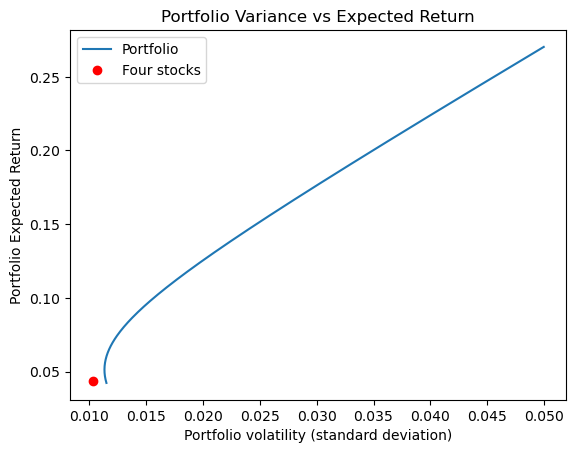

In [15]:
# Create an array of weights from 0 to 1 with a step of 0.01
weights_four = np.arange(0, 3.0, 0.01)


# Initialize lists to store the portfolio variances and expected returns
portfolio_variances = []
portfolio_expected_returns = []
portfolio_volatilities = []


# Loop over the weights
for w in weights_four:
    # Create the weight vector
    w1 = w
    w2 = (1 - w) / 3
    w3 = (1 - w) / 3
    w4 = (1 - w) / 3
   
    weight_vector_four = np.array([w1, w2, w3, w4])


    # Calculate the portfolio variance
    portfolio_variance = np.dot(weight_vector_four.T, np.dot(SD.calculate_covariance("four"), weight_vector_four))
    portfolio_variances.append(portfolio_variance)


    #Calculate the portfolio volatility
    portfolio_volatility = np.sqrt(portfolio_variance)
    portfolio_volatilities.append(portfolio_volatility)


    # Calculate the portfolio expected return
    portfolio_expected_return = np.dot(weight_vector_four, SD.four_stock_vector)
    portfolio_expected_returns.append(portfolio_expected_return)


# Convert the lists to numpy arrays
portfolio_volatilities = np.array(portfolio_volatilities)
portfolio_expected_returns = np.array(portfolio_expected_returns)


# Add your pre-calculated expected return and variance
precalculated_std_dev_four = SD.portfolio_std_dev_four
precalculated_expected_return_four = SD.portfolio_expected_return_four


# Create the plot
plt.plot(portfolio_volatilities, portfolio_expected_returns, label='Portfolio')
plt.plot(precalculated_std_dev_four, precalculated_expected_return_four, 'ro', label='Four stocks')


# Add labels and title
plt.xlabel('Portfolio volatility (standard deviation)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Variance vs Expected Return')


# Show the plot
plt.legend()
plt.show()


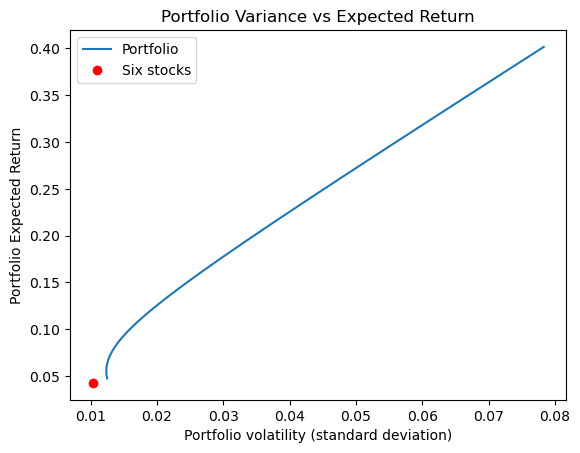

In [16]:
# Create an array of weights from 0 to 1 with a step of 0.01
weights_six = np.arange(0, 5.0, 0.01)


# Initialize lists to store the portfolio variances and expected returns
portfolio_variances = []
portfolio_expected_returns = []
portfolio_volatilities = []


# Loop over the weights
for w in weights_six:
    # Create the weight vector
    w1 = w
    w2 = (1 - w) / 5
    w3 = (1 - w) / 5
    w4 = (1 - w) / 5
    w5 = (1 - w) / 5
    w6 = (1 - w) / 5


    weight_vector_six = np.array([w1, w2, w3, w4, w5, w6])


    # Calculate the portfolio variance
    portfolio_variance = np.dot(weight_vector_six.T, np.dot(SD.calculate_covariance("six"), weight_vector_six))
    portfolio_variances.append(portfolio_variance)


    #Calculate the portfolio volatility
    portfolio_volatility = np.sqrt(portfolio_variance)
    portfolio_volatilities.append(portfolio_volatility)


    # Calculate the portfolio expected return
    portfolio_expected_return = np.dot(weight_vector_six, SD.six_stock_vector)
    portfolio_expected_returns.append(portfolio_expected_return)


# Convert the lists to numpy arrays
portfolio_volatilities = np.array(portfolio_volatilities)
portfolio_expected_returns = np.array(portfolio_expected_returns)


# Add your pre-calculated expected return and variance
precalculated_std_dev_six = SD.portfolio_std_dev_six
precalculated_expected_return_six = SD.portfolio_expected_return_six


# Create the plot
plt.plot(portfolio_volatilities, portfolio_expected_returns, label='Portfolio')
plt.plot(precalculated_std_dev_six, precalculated_expected_return_six, 'ro', label='Six stocks')


# Add labels and title
plt.xlabel('Portfolio volatility (standard deviation)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Variance vs Expected Return')


# Show the plot
plt.legend()
plt.show()


# Conclusion

After reviewing our findings, it appears that his theory holds true in terms of risk reduction. However, our project's results indicate a decline in the expected return when comparing a two-stock portfolio to a six-stock portfolio. Nonetheless, we believe that if we were to include even more stocks, say 30, the outcomes would further support his theory. We anticipate that the expected daily returns would converge towards or even exceed those of the two-stock portfolio while concurrently mitigating risk.